In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image

In [33]:
path = "/content/drive/MyDrive/yalefaces/yalefaces"
im_size = (56, 56)
data_path = dict()
p = list(os.listdir(path))



In [34]:
for i in range(len(p)):
    if p[i].split('.')[-1] != 'gif':
        data_path[i] = os.path.join(path, p[i])

data_path = pd.DataFrame(list(data_path.values()),index=range(1,len(data_path)+1),columns=['path'])
del p

In [35]:
def next_image():
    for i in data_path['path']:
        img = np.array(plt.imread(i), dtype='float32')
        img = cv.resize(img, im_size)
        img /= 255.0 #Normalizing
        yield img.ravel() #returns contiguous flattened array.

In [36]:
images = []
for i in next_image():
    images.append(i)
images = np.array(images)
del i

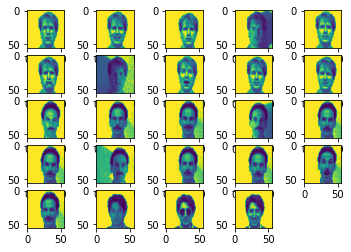

In [66]:

for i in range(24):
  temp_img = np.reshape(images[i],im_size)
  plt.subplot(5,5,i+1)
  plt.imshow(temp_img)
  plt.plot
  


<function matplotlib.pyplot.plot>

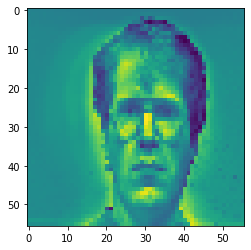

In [50]:
avg_ims = images - images.mean(axis=0)
mean_img = np.reshape(avg_ims[0],im_size)
plt.imshow(mean_img)
plt.plot

<function matplotlib.pyplot.plot>

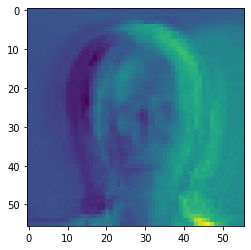

In [208]:
cov_ims = np.cov(avg_ims.T) #Computing Covariance matrix
temp_img = np.reshape(cov_ims[-10],im_size)
plt.imshow(temp_img)
plt.plot


In [72]:
#avg_ims = images - images.mean(axis=0)  #Standardization  

eig_vals, eig_vecs = np.linalg.eigh(cov_ims) #Computing Eigen values, eigen vectors to identify principal components
print("Shape of Avg Image = ", avg_ims.shape)
print("Shape of Cov Matrix = ", cov_ims.shape)
print("Shape of Eigen Vals = ", eig_vals.shape,"Eigen Vectors = ",  eig_vecs.shape) 

Shape of Avg Image =  (164, 3136)
Shape of Cov Matrix =  (3136, 3136)
Shape of Eigen Vals =  (3136,) Eigen Vectors =  (3136, 3136)


In [89]:
#Printing Eigen Values (sampled)
for i in range(10):
  print(eig_vals[i])

-1.6542701667893394e-14
-1.3387206474952054e-14
-9.64944513102712e-15
-9.589897365541086e-15
-8.09424404546658e-15
-7.944973557608503e-15
-7.920461235512394e-15
-7.653546170022542e-15
-7.651411438194063e-15
-7.568609192621966e-15


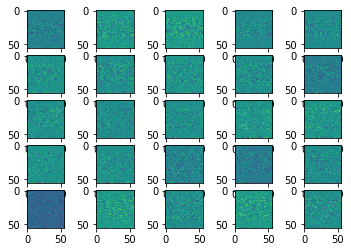

In [141]:
#Displaying Eigen Vectors
j=0
for i in range(3111,3136):
  #temp_2 = math.random()
  temp_img = np.reshape(eig_vecs[i],im_size)
  plt.subplot(5,5,j+1)
  plt.imshow(temp_img)
  plt.plot
  j= j + 1
  


In [245]:
feature_vector = []
reconstructed_image = []
mean_subt = images - images.mean(axis=0)
def reconstruction(k):
  global feature_vector
  global reconstructed_image
  global mean_subt
    
  for i in range(164):
    #feature_vector.append(
    temp = mean_subt[i,:].dot(eig_vecs[:,:k])
    #temp = np.array(temp).T
    temp_2 = temp.dot(eig_vecs[:,:k].T)
    #print(temp_images.shape)
    reconstructed_image.append(np.reshape(temp_2,im_size) + np.reshape(mean_img,im_size))
  return reconstructed_image


In [249]:
temp_1 = reconstruction(3000)
temp_2 = reconstruction(100)

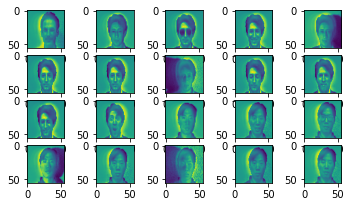

In [228]:
j = 0
for i in range(20,40):
  plt.subplot(5,5,j+1)
  plt.imshow(np.reshape(temp_1[i],im_size))
  plt.plot
  j = j +1

<function matplotlib.pyplot.plot>

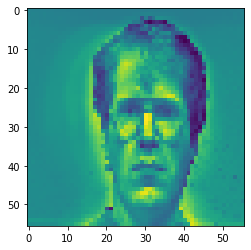

In [250]:
plt.imshow(np.reshape(temp_1[-140],im_size))
plt.plot

<function matplotlib.pyplot.plot>

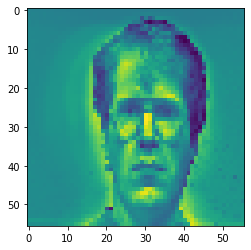

In [251]:
plt.imshow(np.reshape(temp_2[-140],im_size))
plt.plot